# Week 1 Assignment 1


# Singular Value Decomposition (SVD)

 is one of the
most useful tools in machine learning, used in processing image, video and natural languages, constructing
recommender systems, and statistical data analysis.
In particular, SVD is used for dimension reduction
for downstream machine learning tasks, which often
improves the overall performance of the task with reduced computational complexity. 

However, real-world
data often contain noise, outliers, and other anomalies,
and with only a contaminated data matrix at hand,
standard SVD may provide undesirable low-rank decomposition. As a result, there is a need for robust
SVD algorithms that can handle these challenges and
provide accurate and robust results in the presence of
data irregularities.


Note: 

1. U,s,Vt = np.linalg.svd(A) 
The second feature is that NumPy returns the matrix V^T, not V

2. The sum of the singular values is the total amount of “variance” in the matrix. The “raw” singular values are in the numerical scale of the matrix. That means that
if you multiply the data by a scalar, then the singular values will increase. And this
in turn means that the singular values are difficult to interpret, and are basically
impossible to compare across different datasets. 

For this reason, it is often useful to convert the singular values to percent total
variance explained. The formula is simple; each singular value is normalized as
follows:

100*s/np.sum(s)

This normalization is common in principal components analysis, for example, to
determine the number of components that account for 99% of the variance. That can
be interpreted as an indicator of system complexity.


# Exercise 1:

One of the important features of an orthogonal matrix (such as the left and right singular vectors matrices) is that they rotate, but do not scale, a vector. This means that the magnitude of a vector is preserved after multiplication by an orthogonal matrix. 
- a) Prove that $\|\mathbf{U w}\|=\|\mathbf{w}\|$. 
- b) Then demonstrate this empirically in Python by using a singular vectors matrix from the SVD of a random matrix  np.random.randn(5,5) and a random vector w: np.random.randn (5,1)

a) Write here:


Proof:

$
\|\mathbf{U w}\| = \sqrt{ \langle \mathbf{U w}, \mathbf{U w}\rangle} 
                 = \sqrt{ (\mathbf{U w})^T \mathbf{U w}} 
                 = \sqrt{ \mathbf{w}^T \mathbf{U}^T \mathbf{U w}} 
                 = \sqrt{ \mathbf{w}^T \mathbf{w}}
                 = \|\mathbf{w}\|
$


where the orthonormality of $\mathbf{U}$ is used in the fourth equality.

b)

In [121]:
import numpy as np
import matplotlib.pyplot as plt

In [122]:
# empirical demonstration:
A = np.random.randn(5,5)
U,s,Vt = np.linalg.svd(A)
w = np.random.randn (5,1)
# print out the norms
print( np.linalg.norm(np.dot(U,w)) )
print( np.linalg.norm(w) )

1.3791623387473293
1.3791623387473293


# Exercise 2

Your goal here is simple: write a code to reproduce the  panels A, B, C in the Figure below. 


<img src="Figure_assignment.png" width=660 height=300 />

What does this figure show? Panel A shows a $30 \times 40$ random matrix that I created by smoothing random numbers (implemented as the 2D convolution between a 2D Gaussian and random numbers; if you are not familiar with image processing and filtering, then please feel free to copy the code to create this matrix from my code solution). The rest of panel A shows the SVD matrices. It's interesting to note that the earlier singular vectors (associated with the larger singular values) are smoother while the later ones are more rugged; this comes from the spatial filtering.

Panel B shows a "scree plot," which is the singular values normalized to percent variance explained. Notice that the first few components account for most of the variance in the image, while the later components each account for relatively little

Panel C shows the first four “layers”—rank-1 matrices defined as $u_i \sigma_i v_i^T$ on the top row and the cumulative sum of those layers on the bottom row. You can see that each layer
adds more information to the matrix; the lower-right image (titled “L 0:3”) is a rank-4
matrix and yet appears visually very similar to the original rank-30 matrix in panel A.


<>:25: SyntaxWarning: invalid escape sequence '\S'
<>:25: SyntaxWarning: invalid escape sequence '\S'
/var/folders/s_/lffs4n4x60s7pfcdzgnzv89r0000gn/T/ipykernel_1860/1244884417.py:25: SyntaxWarning: invalid escape sequence '\S'
  axs[2].set_title('$\Sigma$')


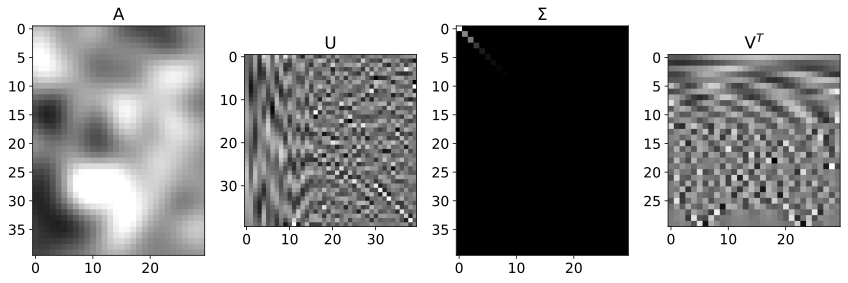

In [123]:

# create the matrix
m = 40
n = 30
# define a 2D Gaussian for smoothing
k = int((m+n)/4)
X,Y = np.meshgrid(np.linspace(-3,3,k),np.linspace(-3,3,k))
g2d = np.exp(-(X**2+Y**2)/(k/8))
# now for the matrix
from scipy.signal import convolve2d
A = convolve2d(np.random.randn(m,n),g2d,mode='same')


# SVD and create Sigma matrox
U,s,Vt = np.linalg.svd(A)
S = np.zeros(np.shape(A))
np.fill_diagonal(S,s)


_,axs = plt.subplots(1,4,figsize=(12,6))
axs[0].imshow(A, aspect='equal', cmap='gray', vmin=-10,vmax=10)
axs[0].set_title('A')
axs[1].imshow(U, aspect='equal', cmap='gray')
axs[1].set_title('U')
axs[2].imshow(S, aspect='equal', cmap='gray')
axs[2].set_title('$\Sigma$')
axs[3].imshow(Vt, aspect='equal', cmap='gray')
axs[3].set_title('V$^T$')
plt.tight_layout()
#plt.savefig('Figure_2.png',dpi=300)
plt.show()




The next figure you will make should be  a "scree plot," which is the singular values s normalized to percent variance explained 100*s/np.sum(s) . Notice that the first few components account for most of the variance in the image, while the later components each account for relatively little variance. Confirm that the sum over all normalized singular values is 100 . 

In [124]:
normalized_sv = 100*s/np.sum(s)

In [125]:
# and show the scree plot
plt.figure(figsize=(12,3))
plt.plot(normalized_sv,'ks-',markersize=10)
plt.xlabel('Component index')
plt.ylabel('Variance explained (%)')
plt.title('Scree plot')
#plt.savefig('Figure_3.png',dpi=300)
plt.show()

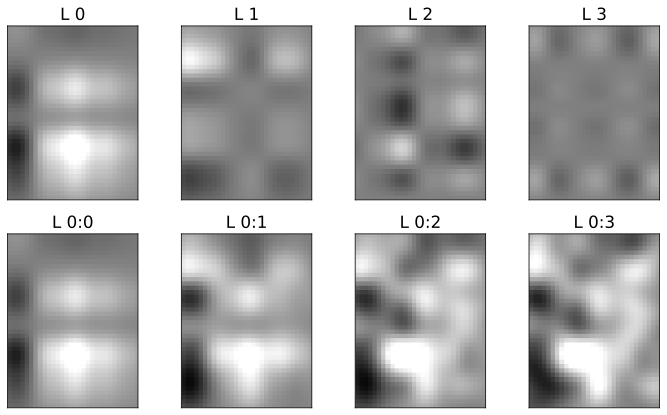

In [126]:

## now show the first N "layers" separately and summed
numLayers = 4
rank1mats = np.zeros((numLayers,m,n))
# setup the figure
_,axs = plt.subplots(2,numLayers,figsize=(10,6))
# the loop
for i in range(numLayers):
    # create this layer
    rank1mats[i,:,:] = np.outer(U[:,i],Vt[i,:])*S[i,i]
    # show this layer
    axs[0,i].imshow(rank1mats[i,:,:],cmap='gray',vmin=-10,vmax=10)
    axs[0,i].set_title(f'L {i}')
    axs[0,i].set_xticks([]), axs[0,i].set_yticks([])

    # show the cumulative sum of layers
    axs[1,i].imshow(np.sum(rank1mats[0:i+1,:,:],axis=0),cmap='gray',vmin=-10,vmax=10)
    axs[1,i].set_title(f'L 0:{i}')
    axs[1,i].set_xticks([]), axs[1,i].set_yticks([])
plt.tight_layout()
plt.savefig('Figure_3.png',dpi=300)
plt.show()

#L0:3 is the best



# Exercise 3

The purpose of PCA is to find a set of basis vectors for a dataset that point in the direction that maximizes covariation across the variables.

The Steps to Perform a PCA

here are the steps to implement a PCA: 
1. Compute the covariance matrix of the data. The resulting covariance matrix will be features-by-features. Each feature in the data must be mean-centered prior to computing covariance.
2. Take the eigendecomposition of that covariance matrix.
3. Sort the eigenvalues descending by magnitude, and sort the eigenvectors accordingly. Eigenvalues of the PCA are sometimes called latent factor scores.
4. Compute the "component scores" as the weighted combination of all data features, where the eigenvector provides the weights. The eigenvector associated with the largest eigenvalue is the "most important" component, meaning the one with the largest variance.
5. Convert the eigenvalues to percent variance explained to facilitate interpretation.


PCA can equivalently be performed via eigendecomposition as previously described or via SVD. There are two ways to perform a PCA using SVD:
- Take the SVD of the covariance matrix. The procedure is identical to that previously described, because SVD and eigendecomposition are the same decomposition for covariance matrices.
- Take the SVD of the data matrix directly. In this case, the right singular vectors (matrix V) are equivalent to the eigenvectors of the covariance matrix (it would be the left singular vectors if the data matrix is stored as features-byobservations). The data must be mean-centered before computing the SVD. The square root of the singular values is equivalent to the eigenvalues of the covariance matrix.


Should you use eigendecomposition or SVD to perform a PCA? You might think that SVD is easier because it does not require the covariance matrix. That's true for relatively small and clean datasets. But larger or more complicated datasets may require data selection or may be too memory intensive to take the SVD of the entire data matrix. In these cases, computing the covariance matrix first can increase analysis flexibility. But the choice of eigendecomposition versus SVD is often a matter of personal preference.

Below I provide a simple example  of some correlated data, add the number of datapoints

In [127]:
# Create some correlated data
X = np.random.randn(100,2)
X[:,1] = np.sum(X,axis=1)

# quick PCA
evals,evecs = np.linalg.eig( np.cov(X.T,ddof=1) )
scores = X @ evecs


# show in a plot
_,axs = plt.subplots(1,2,figsize=(10,5))
axs[0].plot(X[:,0],X[:,1],'ko',markerfacecolor='w')
axs[0].plot([0,3*evecs[0,1]],[0,3*evecs[1,1]],'r-',linewidth=4,label='PC1')
axs[0].plot([0,3*evecs[0,0]],[0,3*evecs[1,0]],'r:',linewidth=4,label='PC2')
axs[0].axis([-5,5,-5,5])
axs[0].set_xlabel('Data axis 1')
axs[0].set_ylabel('Data axis 2')
axs[0].legend()
axs[0].set_title('Data ')


axs[1].plot(scores[:,1],scores[:,0],'ko',markerfacecolor='w')
axs[1].set_xlabel('PC axis 1')
axs[1].set_ylabel('PC axis 2')
axs[1].axis([-6,6,-6,6])
axs[1].set_title('Data in PC space')

plt.tight_layout()
plt.savefig('Figure_8.png',dpi=300)
plt.show()

What do you see in the data? Is there a direction in the data that captures that relation ?

Answer:

The data certainly seems to have some sort of form, it more or less resembles to an elipse whose principle axis lies in the direction given by PC1. I would say furthermore that the directions given by the axis of the elipse capture such relation.

#  Exercise 4

This exercise is  about doing a PCA on a dataset
that contains time series data from the Istanbul stock exchange, along with stock
exchange data from several other stock indices in different countries. We could use
this dataset to ask, for example, whether the international stock exchanges are driven
by one common factor, or whether different countries have independent financial
markets.

(may need pip install openpyxl)

Before performing a PCA, import and inspect the data. 

In [128]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec # for the subplots

import pandas as pd
import seaborn as sns

# NOTE: these lines define global figure properties used for publication.
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') # display figures in vector format
plt.rcParams.update({'font.size':14}) # set global font size

In [129]:
# Data citation: Akbilgic, Oguz. (2013). ISTANBUL STOCK EXCHANGE. UCI Machine Learning Repository.
# data source website: https://archive-beta.ics.uci.edu/ml/datasets/istanbul+stock+exchange

# import the data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00247/data_akbilgic.xlsx"
data = pd.read_excel(url,index_col=0,skiprows=1)

# let's have a look
data

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


ISE     ISE.1        SP       DAX      FTSE    NIKKEI  \
date                                                                     
2009-01-05  0.035754  0.038376 -0.004679  0.002193  0.003894  0.000000   
2009-01-06  0.025426  0.031813  0.007787  0.008455  0.012866  0.004162   
2009-01-07 -0.028862 -0.026353 -0.030469 -0.017833 -0.028735  0.017293   
2009-01-08 -0.062208 -0.084716  0.003391 -0.011726 -0.000466 -0.040061   
2009-01-09  0.009860  0.009658 -0.021533 -0.019873 -0.012710 -0.004474   
...              ...       ...       ...       ...       ...       ...   
2011-02-16  0.008599  0.013400  0.006238  0.001925  0.007952  0.005717   
2011-02-17  0.009310  0.015977  0.003071 -0.001186  0.000345  0.002620   
2011-02-18  0.000191 -0.001653  0.001923  0.002872 -0.000723  0.000568   
2011-02-21 -0.013069 -0.013706 -0.020742 -0.014239 -0.011275  0.001358   
2011-02-22 -0.007246 -0.019442  0.000000 -0.000473 -0.002997 -0.017920   

             BOVESPA        EU        EM  
date                                      
2009-01-05  0.031190  0.012698  0.028524  
2009-01-06  0.018920  0.011341  0.008773  
2009-01-07 -0.035899 -0.017073 -0.020015  
2009-01-08  0.028283 -0.005561 -0.019424  
2009-01-09 -0.009764 -0.010989 -0.007802  
...              ...       ...       ...  
2011-02-16  0.018371  0.006975  0.003039  
2011-02-17  0.001686 -0.000581  0.001039  
2011-02-18  0.005628  0.000572  0.006938  
2011-02-21 -0.011942 -0.012615 -0.000958  
2011-02-22 -0.012252 -0.005465 -0.014297  

[536 rows x 9 columns]

You will perform some investigations of the international stock exchange dataset and use the library seaborn:

1. show some data in line plots
2. show correlations of all columns

    - Seaborn's pairplot shows a lot of positive correlations
    sns.pairplot(data,height=1.5)

3. Show the correlation matrix in an image (make a heatmap with seaborn library heatmap(data.corr(),vmin=-1,vmax=1,annot=True,cmap='bwr'))

4. Now for the PCA. Implement the PCA using the five steps. Visualize the results as in Figure




##### 1.- Show some data in line plots

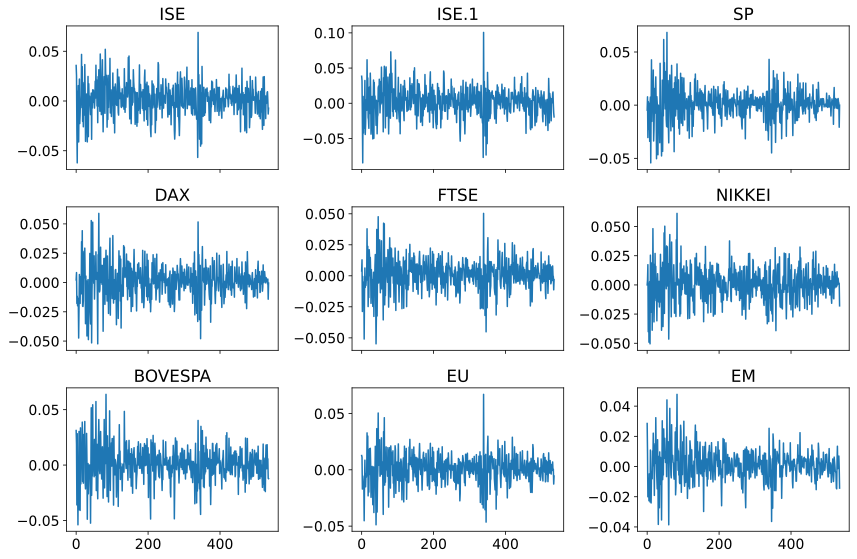

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(12, 8), sharex=True)
labels = ["ISE", "ISE.1", "SP", 'DAX', 'FTSE', 'NIKKEI', 'BOVESPA', 'EU', 'EM']

X = data.values

for i, ax in enumerate(axes.flat):
    ax.plot(X[:, i])
    ax.set_title(labels[i])

plt.tight_layout()
plt.show()

##### 2.- Show correlations of all columns


In [57]:
sns.pairplot(data,height=1.5)

##### 3.- Show the correlation matrix in an image (make a heatmap with seaborn library heatmap(data.corr(),vmin=-1,vmax=1,annot=True,cmap='bwr')).

<Axes: >

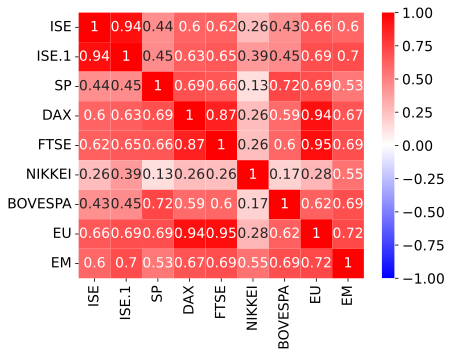

In [32]:
sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, cmap='bwr')

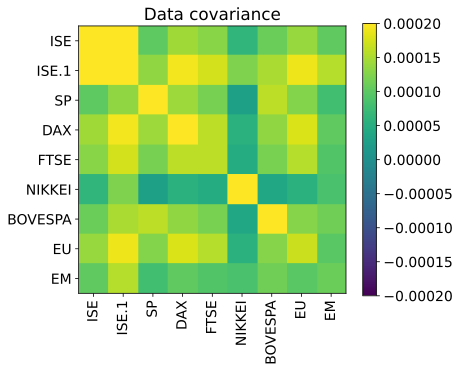

In [76]:
#### now for PCA!

# Step 1: covariance matrix
X = data.values # extract data
X = X - np.mean(X,axis=0,keepdims=True) # mean-center via broadcasting

# note: these data are observations-by-features, so we need X^TX, not XX^T
covmat = X.T@X / (X.shape[0]-1)

# visualize it
plt.figure(figsize=(6,6))
plt.imshow(covmat,vmin=-.0002,vmax=.0002)
plt.colorbar(shrink=.82)
plt.title('Data covariance')
plt.xticks(range(X.shape[1]),labels=data.columns,rotation=90)
plt.yticks(range(X.shape[1]),labels=data.columns)
#plt.savefig('Figure_1.png',dpi=300)
plt.show()

(536, 2)


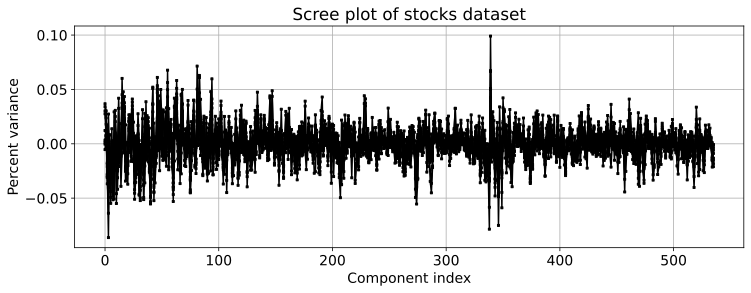

In [81]:
# Step 2: eigendecomposition
evals,evecs = np.linalg.eig(covmat)

# Step 3: sort results
sidx  = np.argsort(evals)[::-1]
evals = evals[sidx]
evecs = evecs[:,sidx]

# Step 4: component scores
components = X @ evecs[:,0:2]
print(components.shape)

# Step 5: eigenvalues to %var
factorScores = 100*evals/np.sum(evals)


# show scree plot
plt.figure(figsize=(12,4))
plt.plot(X,'ks-',markersize=2)
plt.xlabel('Component index')
plt.ylabel('Percent variance')
plt.title('Scree plot of stocks dataset')
plt.grid()
plt.show()

In [82]:
# Show that variance of the components equals the eigenvalue
print('Variance of first two components:')
print(np.var(components,axis=0,ddof=1)) # note the ddof=1! The default produces the biased variance.

print(f'\nFirst two eigenvalues:')
print(evals[0:2])

Variance of first two components:
[0.0013006  0.00028585]

First two eigenvalues:
[0.0013006  0.00028585]


In [90]:
components


array([[ 0.0524148 ,  0.01548812],
       [ 0.04506811,  0.00748826],
       [-0.06959746,  0.02407384],
       ...,
       [ 0.00145891, -0.0050516 ],
       [-0.0368831 ,  0.01059206],
       [-0.02880234, -0.01134873]], shape=(536, 2))

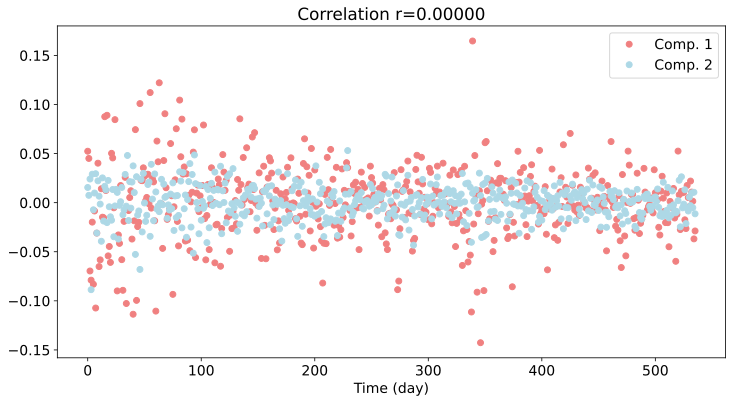

In [106]:
# correlate first two components

plt.figure(figsize=(12,6))
plt.plot(components[:,0], 'o', color = 'lightcoral')
plt.plot(components[:,1],'o', color = 'lightblue')
plt.xlabel('Time (day)')
plt.legend(['Comp. 1','Comp. 2'])
plt.title(f'Correlation r={np.corrcoef(components.T)[0,1]:.5f}')
plt.show()

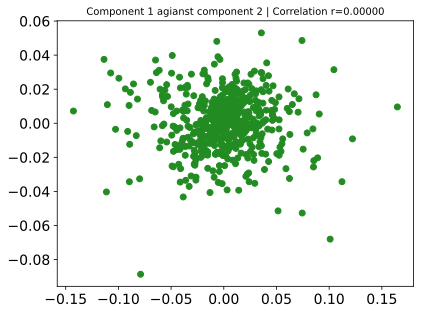

In [114]:
plt.plot(components[:,0], components[:,1], 'o', color = 'forestgreen')
plt.title(f'Component 1 agianst component 2 | Correlation r={np.corrcoef(components.T)[0,1]:.5f}',
          fontsize = 10)
plt.show()

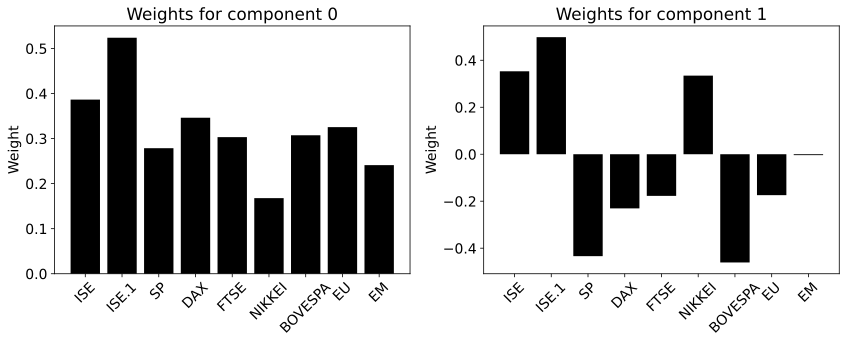

In [89]:
_,axs = plt.subplots(1,2,figsize=(12,5))

for i in range(2):
  axs[i].bar(range(X.shape[1]),evecs[:,i],color='black')
  axs[i].set_xticks(range(X.shape[1]))
  axs[i].set_xticklabels(data.columns,rotation=45)
  axs[i].set_ylabel('Weight')
  axs[i].set_title(f'Weights for component {i}')

plt.tight_layout()
plt.show()

In [115]:
factorScores


array([64.10140478, 14.08853005,  9.61237955,  6.03925492,  2.97963327,
        1.1958931 ,  1.10384893,  0.63257407,  0.24648133])

Complete the Discussion: 

The scree plot strongly suggests that the international stock exchanges are driven by a common factor of the global economy: 

there is one large component that accounts for around 64% of the variance in the data, while the other components each account for less than 36% of the variance 


From the perspective of dimensionality reduction, we could reduce the entire dataset to the component associated with the largest eigenvalue (this is often called the top component), thereby representing this 9D dataset using a 1D vector. Of course, we lose information- 36% of the information in the dataset is removed if we focus only on the top component-but hopefully, the important features of the signal are in the top component while the less important features, including random noise, are ignored.

# Exercise 5

Reproduce the above numerical results using 

(1) the SVD of the data covariance matrix and 

(2) the SVD of the data matrix itself. 

Remember that the eigenvalues of $\mathbf{X}^{\mathrm{T}} \mathbf{X}$ are the squared singular values of $\mathbf{X}$; furthermore, the scaling factor on the covariance matrix must be applied to the singular values to find equivalence.

In [118]:
### SVD on covariance matrix

# It suffices to show that the eigenvalues and singular values match, and that the eigenvectors and singular vectors match.
# Here I only show the first four values and the first vector.

# SVD
U,s,Vt = np.linalg.svd(covmat)

# eigen/singular values
print('First 4 eigenvalues:')
print([evals[i] for i in range(4)])

print(f'\nFirst 4 singular values:')
print([s[i] for i in range(4)])


# eigen/singular vectors
print('\n\n\nFirst eigenvector:')
print(evecs[:,0])

print('\nFirst singular vector:')
print(U[:,0])

First 4 eigenvalues:
[np.float64(0.001300599548875124), np.float64(0.0002858523287431241), np.float64(0.00019503248882503355), np.float64(0.0001225347908113611)]

First 4 singular values:
[np.float64(0.0013005995488751241), np.float64(0.00028585232874312497), np.float64(0.00019503248882503366), np.float64(0.00012253479081136078)]



First eigenvector:
[0.3864847  0.52390953 0.27860507 0.34621538 0.30322542 0.16781756
 0.30741897 0.32544121 0.24111348]

First singular vector:
[-0.3864847  -0.52390953 -0.27860507 -0.34621538 -0.30322542 -0.16781756
 -0.30741897 -0.32544121 -0.24111348]


Note that the both vectors generate the same eigenspace, actually, as eigenvectors, they are the same.

In [120]:
### SVD on data matrix

# Again, we can simply show that the singular values (suitably normalized) match the eigenvalues, and that
# the singular vectors match the eigenvectors.

# Note that the data variable X is already mean-centered!
U,s,Vt = np.linalg.svd(X)  # SVD


# eigen/singular values
print('First 4 eigenvalues:')
print(evals[:4])

print(f'\nFirst 4 singular values:')
print(s[:4]**2/(X.shape[0]-1))


# eigen/singular vectors
print('\n\n\nFirst eigenvector:')
print(evecs[:,0])

print('\nFirst right singular vector:')
print(Vt[0,:])

First 4 eigenvalues:
[0.0013006  0.00028585 0.00019503 0.00012253]

First 4 singular values:
[0.0013006  0.00028585 0.00019503 0.00012253]



First eigenvector:
[0.3864847  0.52390953 0.27860507 0.34621538 0.30322542 0.16781756
 0.30741897 0.32544121 0.24111348]

First right singular vector:
[-0.3864847  -0.52390953 -0.27860507 -0.34621538 -0.30322542 -0.16781756
 -0.30741897 -0.32544121 -0.24111348]


As expected, we have got the same results.